# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data from a Portuguese banking institute gives the results of direct marketing campaigns done by the company. These campaigns were done through phone calls. The phone calls involve telephone and cellular calls. In total, there were 41,188 calls. Of these calls, 15,044 were telephone calls and 26,144 were cellular calls. The highest number of times contact had to be made during the campaign was 56 times.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
# Import the appropriate libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data

bankf = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
# Sample the first 5 rows of the full dataset

bankf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



There are no missing values from this dataset. However, it should be noted that this dataset is significantly unbalanced with about 88.73% of people choosing not to subscribe to the term deposit and only 11.27% of people choosing to subscribe. This dataset is filled with floats, integers, and objects. Some features may need to be converted/encoded later during feature selection before modeling. This dataset was filled with a few duplicates which were removed.

In [6]:
# Check/count the missing data

missing_data = bankf.isnull().sum()
missing_data

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# Check for duplicate data

duplicates = bankf.duplicated().sum()
duplicates

12

In [8]:
# Drop the duplicated data

bankf.drop_duplicates(inplace=True)

In [9]:
# Find the proportion of people who chose to subscribe

proportion = bankf['y'].value_counts(normalize=True)*100
proportion

y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Number of accepted subscriptions by job')

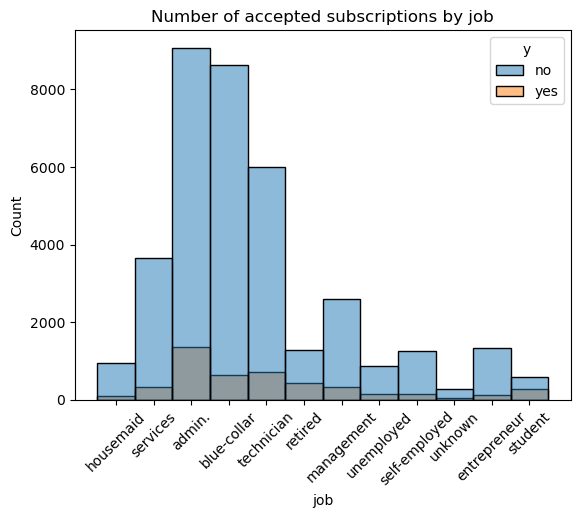

In [10]:
# Visualize the job column using a histogram

sns.histplot(x='job', hue='y', data=bankf)
plt.xticks(rotation=45)
plt.title('Number of accepted subscriptions by job')

Married people with a technician, admin, student, or retired job
y
no     0.855308
yes    0.144692
Name: proportion, dtype: float64
All others
y
no     0.891747
yes    0.108253
Name: proportion, dtype: float64


Text(0.5, 1.1, 'Subscription Acceptance for Married People With a Technician, Admin, Student, or Retired  Job to All Others')

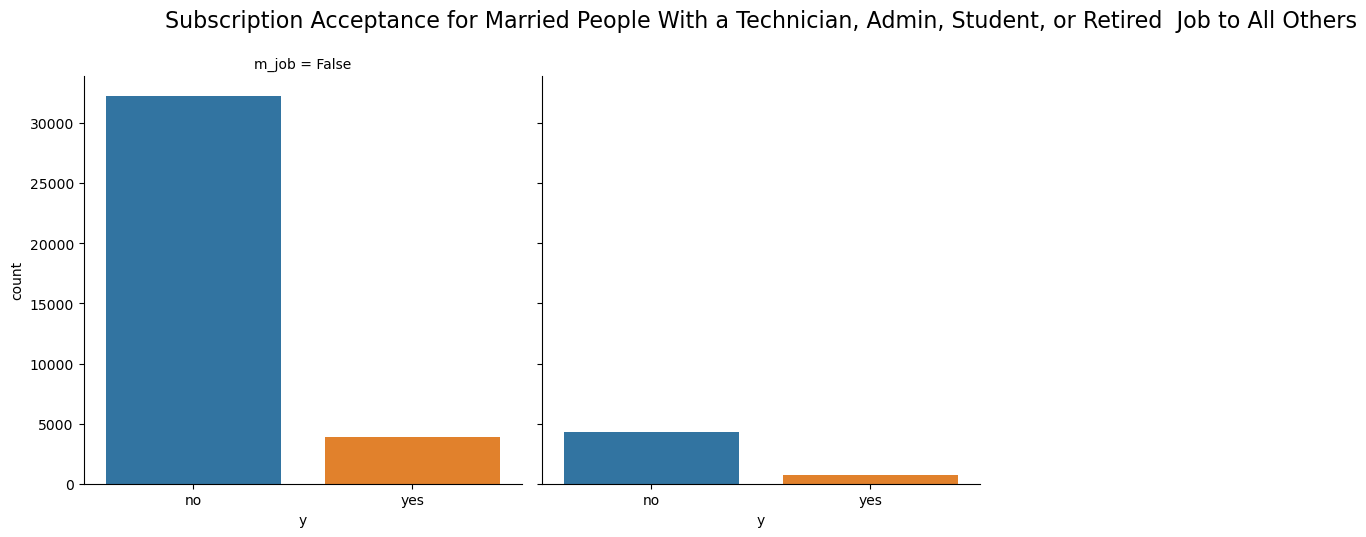

In [11]:
# Compare acceptance of married people with a technician, admin, student, or retired job to all others
bmarried = ['married']
bc_job = ['technician', 'admin', 'student', 'retired']

# Copy the bankf dataframe
married_job = bankf.copy()

# Create a new column to classify married people with a technician, admin, student, or retired job
married_job['m_job'] = married_job.apply(lambda x: True if (x['marital'] in (bmarried)) and (x['job'] in (bc_job)) else False, axis=1)

# Acceptance rate married people with a technician, admin, student, or retired job
print('Married people with a technician, admin, student, or retired job')
married_job_accepted = married_job.query('m_job == True')['y'].value_counts(normalize = True)
print(married_job_accepted)
# Acceptance rate all others
print('All others')
all_others = married_job.query('m_job == False')['y'].value_counts(normalize = True)
print(all_others)

# Plot data
sns.catplot(x='y', col='m_job', data=married_job, kind='count', hue='y')
plt.title('Subscription Acceptance for Married People With a Technician, Admin, Student, or Retired  Job to All Others', y=1.1, fontsize = 16)

People with a university degree and no personal loan
y
no     0.860199
yes    0.139801
Name: proportion, dtype: float64
All others
y
no     0.895993
yes    0.104007
Name: proportion, dtype: float64


Text(0.5, 1.1, 'Subscription Acceptance for People With a University Degree and No Personal Loan to All Others')

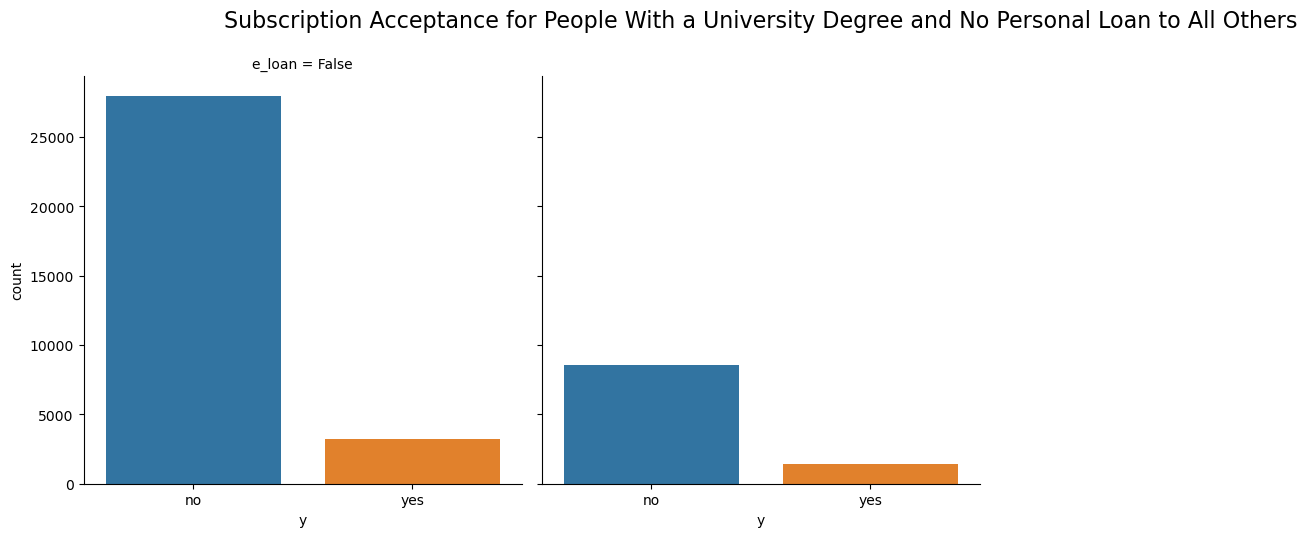

In [12]:
# Compare acceptance of people with a university degree and no personal loan to all others
beducation = ['university.degree']
bloan= ['no']

# Copy the bankf dataframe
education_loan = bankf.copy()

# Create a new column to classify people with a university degree and no personal loan
education_loan['e_loan'] = education_loan.apply(lambda x: True if (x['education'] in (beducation)) and (x['loan'] in (bloan)) else False, axis=1)

# Acceptance rate people with a university degree and no personal loan
print('People with a university degree and no personal loan')
education_loan_accepted = education_loan.query('e_loan == True')['y'].value_counts(normalize = True)
print(education_loan_accepted)
# Acceptance rate all others
print('All others')
all_others = education_loan.query('e_loan == False')['y'].value_counts(normalize = True)
print(all_others)

# Plot data
sns.catplot(x='y', col='e_loan', data=education_loan, kind='count', hue='y')
plt.title('Subscription Acceptance for People With a University Degree and No Personal Loan to All Others', y=1.1, fontsize = 16)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [13]:
bankf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

A Portuguese banking institution is attempting to get more clients to subscribe to a term deposit. The institution is reaching out to various clients through phone calls. Unfortunately, individual phone calls must be made to various clients with each client likely requiring multiple calls. This is time-consuming and unrewarding, especially if the client refuses to subscribe to a term deposit in the end. Therefore, the Portuguese banking institution must figure out which characteristics describe a client that will likely say "yes" to subscribing to a term deposit. Using classification models to determine the accurate model with the best features, the institution will be able to direct its marketing campaigns to clients that are more likely to subscribe which will bring in more business to the institution. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [14]:
# Prepare the target column
y_code = {'no': 0,'yes': 1}                                        
bankf['target'] = bankf['y'].map(y_code)

Text(0.5, 2.3, 'The acceptance of categorical features')

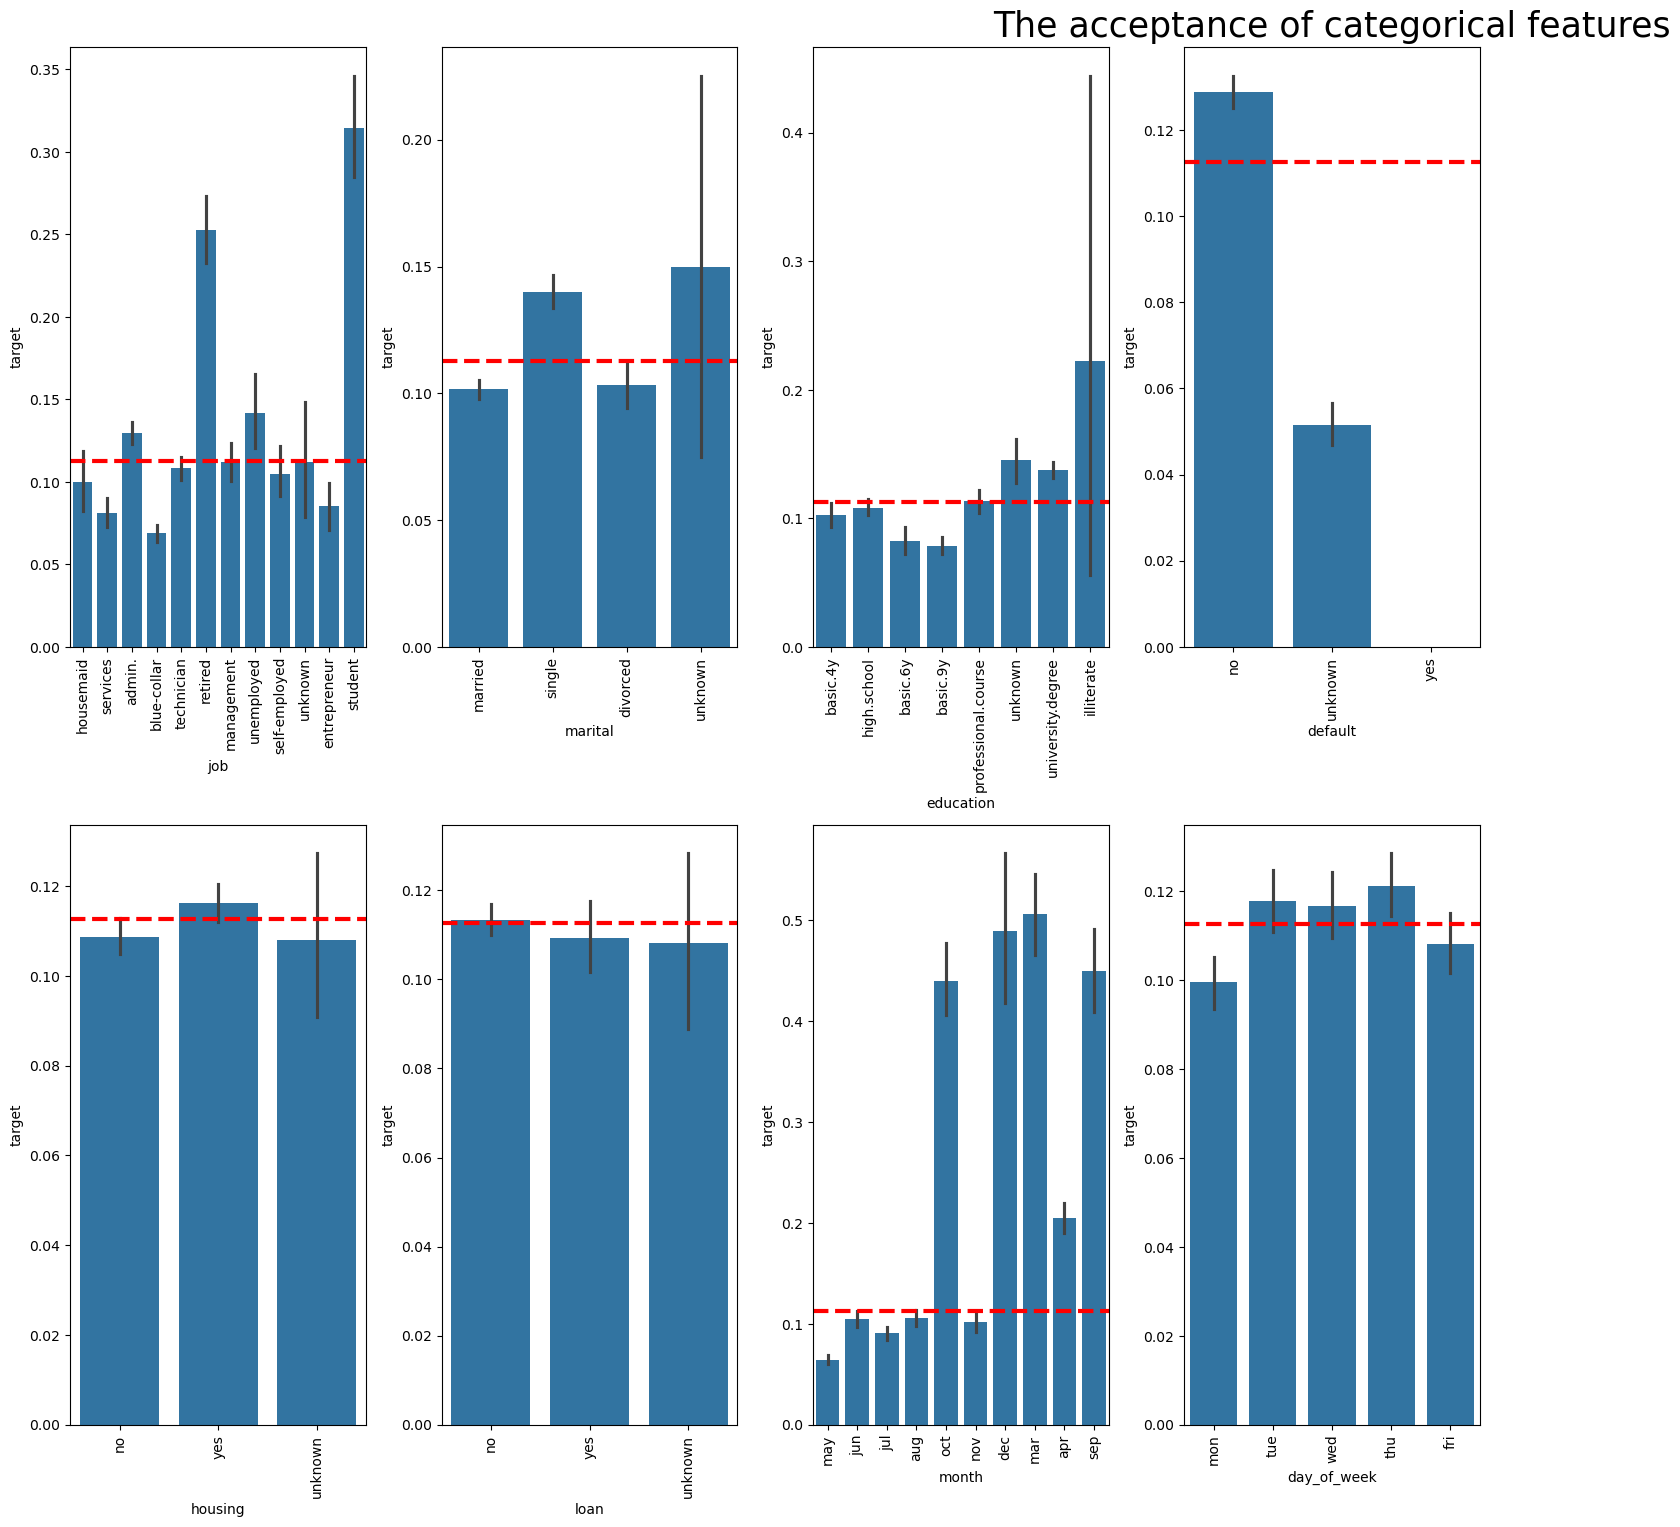

In [15]:
# Visualize and compare the acceptance of categorical features

categories = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week']

plt.figure(figsize=(15,15))
for i in enumerate(categories):
        plt.subplot(2,4,i[0]+1)
        fig=sns.barplot(x=i[1],y=bankf['target'],data=bankf[['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'target']])
        plt.axhline(bankf.target.mean(), color='r', linestyle='dashed', linewidth=3)
        plt.xticks(rotation=90)
        plt.tight_layout(h_pad=1)
plt.title('The acceptance of categorical features', y=2.3, fontsize = 25)

In [16]:
# Encode the other nonnumeric features
# Individual encoding opposed to label encoding is done so I can order the labels myself

# job
job_code = {'unknown': 0,'unemployed': 1,'student': 2,'housemaid': 3, 'services': 4,'technician': 5, 'admin.': 6,'blue-collar': 7, 'management': 8,'self-employed': 9, 'entrepreneur': 10, 'retired': 11}                                        
bankf['job_n'] = bankf['job'].map(job_code)

# marital
marital_code = {'unknown': 0, 'single': 1,'married': 2, 'divorced': 3}                                        
bankf['marital_n'] = bankf['marital'].map(marital_code)

# education
education_code = {'unknown': 0,'illiterate': 1,'high.school': 2,'professional.course': 3, 'basic.4y': 4,'basic.6y': 5, 'basic.9y': 6,'university.degree': 7}                                        
bankf['education_n'] = bankf['education'].map(education_code)

# housing
housing_code = {'no': 0,'yes': 1, 'unknown': 2}                                        
bankf['housing_n'] = bankf['housing'].map(housing_code)

# loan
loan_code = {'no': 0,'yes': 1, 'unknown': 2}                                        
bankf['loan_n'] = bankf['loan'].map(loan_code)

# month
month_code = {'mar': 2,'apr': 3, 'may': 4,'jun': 5, 'jul': 6,'aug': 7, 'sep': 8,'oct': 9, 'nov': 10, 'dec': 11}                                        
bankf['month_n'] = bankf['month'].map(month_code)

# day_of_week
day_code = {'mon': 0,'tue': 1, 'wed': 2,'thu': 3, 'fri': 4}                                        
bankf['day_n'] = bankf['day_of_week'].map(day_code)

In [17]:
# Delete the nonnumerical columns

del bankf["job"]
del bankf["marital"]
del bankf["education"]
del bankf["default"]
del bankf["housing"]
del bankf["loan"]
del bankf["contact"]
del bankf["month"]
del bankf["day_of_week"]
del bankf["poutcome"]
del bankf["duration"]
del bankf["y"]

In [18]:
# Reset the index
bankf = bankf.reset_index(drop=True)
bankf

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,job_n,marital_n,education_n,housing_n,loan_n,month_n,day_n
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,3,2,4,0,0,4,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,4,2,2,0,0,4,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,4,2,2,1,0,4,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,6,2,5,0,0,4,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,4,2,2,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,11,2,3,1,0,10,4
41172,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,7,2,3,0,0,10,4
41173,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,11,2,7,1,0,10,4
41174,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,5,2,3,0,0,10,4


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [19]:
# Split it into the training sets and test sets

X= bankf[["job_n", "marital_n"]]
y = bankf["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [60]:
# Create and fit a random classifier model

# Record the start time 
rcl_start_time = time.time()

rcl = DummyClassifier(strategy='stratified')
rcl.fit(X_train, y_train)

# Record the end time 
rcl_end_time = time.time()
rcl_elapsed_time = rcl_end_time - rcl_start_time
print(f"Baseline training time: {rcl_elapsed_time} seconds")

Baseline training time: 0.0021750926971435547 seconds


In [21]:
# Make predictions with the random classifier model

rcl_pred = rcl.predict(X_test)

In [22]:
# Calculate the recall score of the random classifier model on the test data

rcl_recall = recall_score(y_test, rcl_pred, average='macro')
rcl_recall


0.4995293660688529

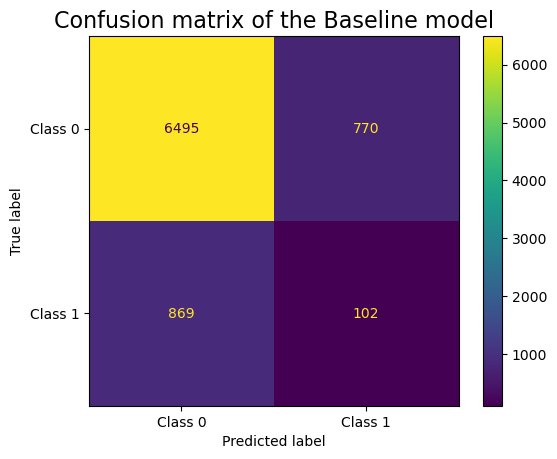

In [23]:
# Visualize the confusion matrix of the Baseline model

rcl_cm = confusion_matrix(y_test, rcl_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rcl_cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion matrix of the Baseline model', y=1, fontsize = 16)
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [75]:
# Create and fit a simle Logistic Regression model

# Record the start time 
lr_start_time = time.time()

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Record the end time 
lr_end_time = time.time()
lr_elapsed_time = lr_end_time - lr_start_time
print(f"Logistic regression training time: {lr_elapsed_time} seconds")

Logistic regression training time: 0.025065898895263672 seconds


In [69]:
# Find the coefficients and intercept of the logistic regression model

lr_coefs = lr.coef_ 
lr_int = lr.intercept_ 

print(f"Logistic regression coefficients: {lr_coefs}")
print(f"Logistic regression intercept: {lr_int}")

Logistic regression coefficients: [[ 0.01909054 -0.25574149]]
Logistic regression intercept: [-1.73608207]


In [25]:
# Make predictions with the Logistic Regression model

lr_pred = lr.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [26]:
# Calculate the recall score of the Logistic Regression model on the test data

lr_recall = recall_score(y_test, lr_pred, average='macro')
lr_recall

0.5

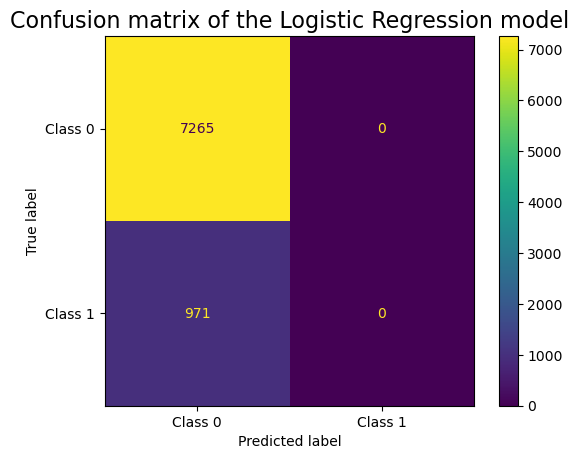

In [27]:
# Visualize the confusion matrix of the Logistic Regression model

lr_cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion matrix of the Logistic Regression model', y=1, fontsize = 16)
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### KNN Model

In [88]:
# Create and fit a KNN  model

# Record the start time 
knn_start_time = time.time()

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

# Record the end time 
knn_end_time = time.time()
knn_elapsed_time = knn_end_time - knn_start_time
print(f"KNN training time: {knn_elapsed_time} seconds")


KNN training time: 0.013350248336791992 seconds


In [29]:
# Make predictions with the KNN model

knn_pred = knn.predict(X_test)

In [30]:
# Calculate the recall score of the KNN model on the test data

knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_recall

0.5332148479334988

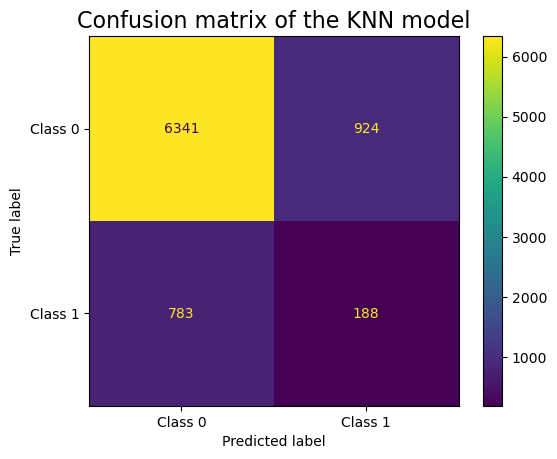

In [31]:
# Visualize the confusion matrix of the KNN model

knn_cm = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion matrix of the KNN model', y=1, fontsize = 16)
plt.show()

### Decision Tree Model

In [32]:
# Create and fit a decision tree  model

# Record the start time 
dtree_start_time = time.time()

dtree = tree.DecisionTreeClassifier(criterion ='entropy')
dtree.fit(X_train, y_train)

# Record the end time 
dtree_end_time = time.time()
dtree_elapsed_time = dtree_end_time - dtree_start_time
print(f"Decision Tree training time: {dtree_elapsed_time} seconds")

Decision Tree training time: 0.0061151981353759766 seconds


In [33]:
# Make predictions with the Decision Tree model

dtree_pred = dtree.predict(X_test)

In [34]:
# Calculate the recall score of the Deciison Tree model on the test data

dtree_recall = recall_score(y_test, dtree_pred, average='macro')
dtree_recall

0.5

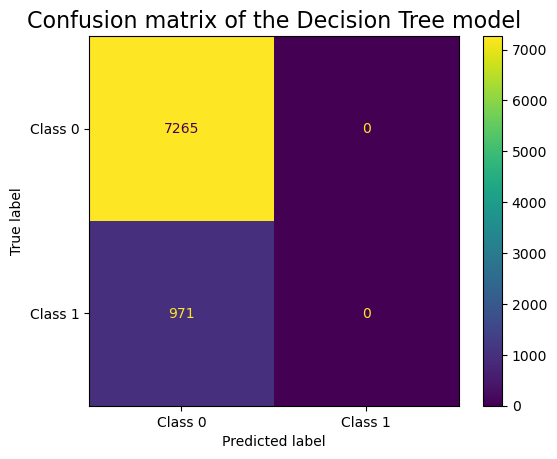

In [35]:
# Visualize the confusion matrix of the Decision Tree model

dtree_cm = confusion_matrix(y_test, dtree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dtree_cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion matrix of the Decision Tree model', y=1, fontsize = 16)
plt.show()

### SVM Model

In [36]:
# Create and fit a SVM  model

# Record the start time 
svm_start_time = time.time()

svm = SVC(kernel ='linear')
svm.fit(X_train, y_train)

# Record the end time 
svm_end_time = time.time()
svm_elapsed_time = svm_end_time - svm_start_time
print(f"SVM training time: {svm_elapsed_time} seconds")

SVM training time: 1.863595962524414 seconds


In [37]:
# Make predictions with the SVM model

svm_pred = svm.predict(X_test)

In [38]:
# Calculate the recall score of the SVM model on the test data

svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_recall

0.5

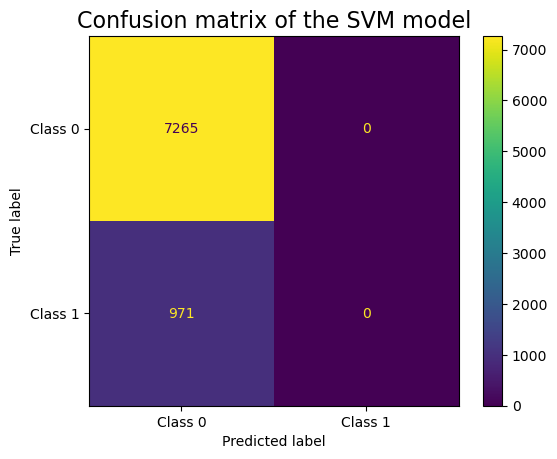

In [39]:
# Visualize the confusion matrix of the SVM model

svm_cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion matrix of the SVM model', y=1, fontsize = 16)
plt.show()

In [93]:
data = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
        'Train Time': [lr_elapsed_time, knn_elapsed_time, dtree_elapsed_time, svm_elapsed_time],
        'Train Accuracy': [lr.score(X_train, y_train), knn.score(X_train, y_train), dtree.score(X_train, y_train), svm.score(X_train, y_train)],
        'Test Accuracy': [lr.score(X_test, y_test), knn.score(X_test, y_test), dtree.score(X_test, y_test), svm.score(X_test, y_test)]}

df_models = np.round(pd.DataFrame(data), decimals = 4)
df_models

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.0251,0.8886,0.8821
1,KNN,0.0134,0.7922,0.7927
2,Decision Tree,0.0061,0.8886,0.8821
3,SVM,1.8636,0.8886,0.8821


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Logistic Ridge Regression Using GridSearchCV

In [41]:
# Create the Pipeline for the Ridge model
pipeline_ridge = Pipeline([
        ('bankf_transform', PolynomialFeatures(degree=3, include_bias=False)),
        ('scaler', StandardScaler()),
        ('bankf_regression', Ridge())
        ])

In [42]:
# Set the parameters and create the GridSearchCV object
params_to_try = {'bankf_regression__alpha':[1,10,100,1000]}

lr_finder = GridSearchCV(pipeline_ridge, param_grid=params_to_try)

In [43]:
# Fit the GridSearchCV object
numeric_features = bankf[["job_n", "marital_n"]]
lr_finder.fit(numeric_features, bankf["target"])

GridSearchCV(estimator=Pipeline(steps=[('bankf_transform',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('bankf_regression', Ridge())]),
             param_grid={'bankf_regression__alpha': [1, 10, 100, 1000]})

In [44]:
# Find the best model
best_model = lr_finder.best_estimator_
best_model

Pipeline(steps=[('bankf_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('bankf_regression', Ridge(alpha=1000))])

In [45]:
# Cross-Validate
lr_finder.cv_results_

{'mean_fit_time': array([0.00836396, 0.00704932, 0.00684562, 0.0080441 ]),
 'std_fit_time': array([0.00244178, 0.00175239, 0.00150364, 0.00302726]),
 'mean_score_time': array([0.00159101, 0.00122209, 0.001334  , 0.0009553 ]),
 'std_score_time': array([6.89539810e-04, 4.67317138e-04, 5.65977976e-04, 3.85971330e-05]),
 'param_bankf_regression__alpha': masked_array(data=[1, 10, 100, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'bankf_regression__alpha': 1},
  {'bankf_regression__alpha': 10},
  {'bankf_regression__alpha': 100},
  {'bankf_regression__alpha': 1000}],
 'split0_test_score': array([-0.32906515, -0.32980938, -0.33319026, -0.33109896]),
 'split1_test_score': array([-0.11711515, -0.11630188, -0.1155172 , -0.11124437]),
 'split2_test_score': array([-0.0935909 , -0.09128092, -0.08609819, -0.08240627]),
 'split3_test_score': array([0.01152442, 0.01175767, 0.01145437, 0.01052897]),
 'split4_test_score': array(

### KNN model with N=10

In [46]:
# Create and fit a KNN  model with n=10

# Record the start time 
knn_t_start_time = time.time()

knn_t = KNeighborsClassifier(n_neighbors = 10)
knn_t.fit(X_train, y_train)

# Record the end time 
knn_t_end_time = time.time()
knn_t_elapsed_time = knn_t_end_time - knn_t_start_time
print(f"KNN with n=10 training time: {knn_t_elapsed_time} seconds")


KNN with n=10 training time: 0.010221004486083984 seconds


In [47]:
# Make predictions with the KNN_t model

knn_t_pred = knn_t.predict(X_test)

In [48]:
# Calculate the recall score of the KNN_t model on the test data

knn_t_recall = recall_score(y_test, knn_t_pred, average='macro')
knn_t_recall

0.5

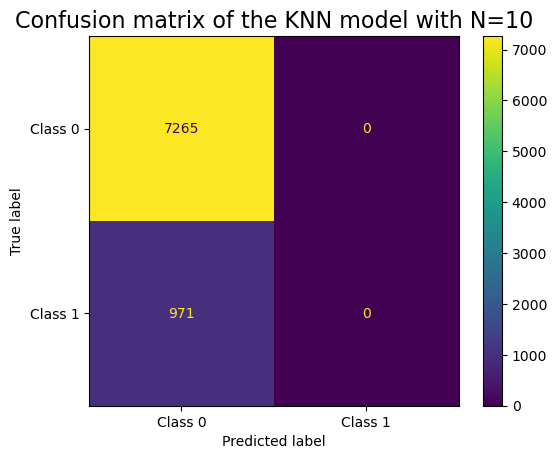

In [49]:
# Visualize the confusion matrix of the KNN_t model

knn_t_cm = confusion_matrix(y_test, knn_t_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_t_cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion matrix of the KNN model with N=10', y=1, fontsize = 16)
plt.show()

### Max_depth of the Decision Tree model

In [50]:
# Calculate the max_depth of dtree

max_depth = dtree.tree_.max_depth
print("Maximum depth:", max_depth)

Maximum depth: 8


In [51]:
# Create and fit a decision tree  model with max_depth=4

# Record the start time 
dtree_f_start_time = time.time()

dtree_f = tree.DecisionTreeClassifier(max_depth=4, criterion ='entropy')
dtree_f.fit(X_train, y_train)

# Record the end time 
dtree_f_end_time = time.time()
dtree_f_elapsed_time = dtree_f_end_time - dtree_f_start_time
print(f"Decision Tree with max_depth=4 training time: {dtree_f_elapsed_time} seconds")

Decision Tree with max_depth=4 training time: 0.005657196044921875 seconds


In [52]:
# Make predictions with the Decision Tree model with max_depth=4

dtree_f_pred = dtree_f.predict(X_test)

In [53]:
# Calculate the recall score of the Deciison Tree model with max_depth=4 on the test data

dtree_f_recall = recall_score(y_test, dtree_f_pred, average='macro')
dtree_f_recall

0.5

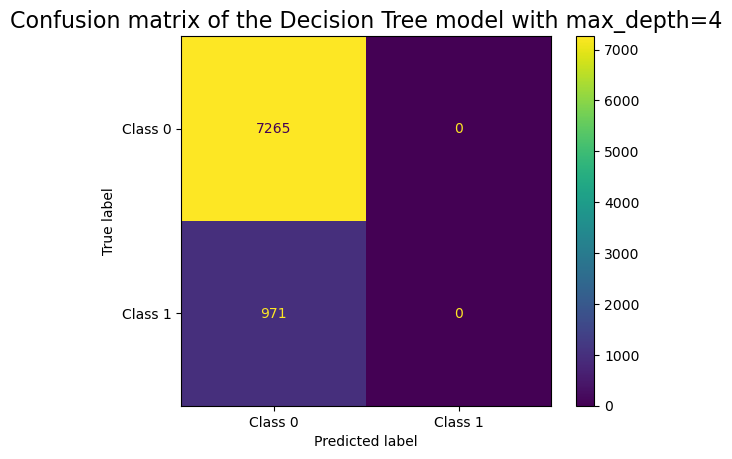

In [54]:
# Visualize the confusion matrix of the Decision Tree model with max_depth=4

dtree_f_cm = confusion_matrix(y_test, dtree_f_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dtree_f_cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion matrix of the Decision Tree model with max_depth=4', y=1, fontsize = 16)
plt.show()

### Use a polynomial kernel for SVM

In [55]:
# Create and fit a SVM  model with a polynomial kernel

# Record the start time 
svm_pk_start_time = time.time()

svm_pk = SVC(kernel='poly', gamma='scale', coef0=1, degree=3)
svm_pk.fit(X_train, y_train)

# Record the end time 
svm_pk_end_time = time.time()
svm_pk_elapsed_time = svm_pk_end_time - svm_pk_start_time
print(f"SVM with a Polynomial Kernel training time: {svm_pk_elapsed_time} seconds")

SVM with a Polynomial Kernel training time: 2.335052967071533 seconds


In [56]:
# Make predictions with the svm_pk model

svm_pk_pred = svm_pk.predict(X_test)

In [57]:
# Calculate the recall score of the svm_pk model on the test data

svm_pk_recall = recall_score(y_test, svm_pk_pred, average='macro')
svm_pk_recall

0.5

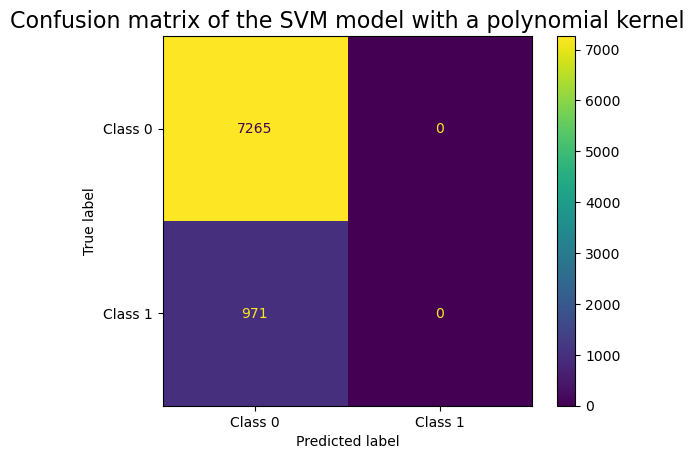

In [58]:
# Visualize the confusion matrix of the svm_pk model

svm_pk_cm = confusion_matrix(y_test, svm_pk_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_pk_cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion matrix of the SVM model with a polynomial kernel', y=1, fontsize = 16)
plt.show()

##### Questions